<a href="https://colab.research.google.com/github/manali2505/BharatIntern_Internship_Data_Science/blob/master/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:05<00:00, 177MB/s]
100% 1.06G/1.06G [00:05<00:00, 202MB/s]


In [3]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,BatchNormalization,MaxPooling2D,Dropout

In [5]:
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
#Normalization
def process(image,label):
  image=tf.cast(image/255.,tf.float32)
  return image,label
train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [7]:
#Creation of CNN model
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [9]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [10]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 70s 98ms/step - loss: 0.7549 - accuracy: 0.6247 - val_loss: 0.5766 - val_accuracy: 0.7014
Epoch 2/10
625/625 [==============================] - 56s 90ms/step - loss: 0.5142 - accuracy: 0.7481 - val_loss: 0.5041 - val_accuracy: 0.7520
Epoch 3/10
625/625 [==============================] - 58s 92ms/step - loss: 0.4308 - accuracy: 0.7980 - val_loss: 0.4871 - val_accuracy: 0.7626
Epoch 4/10
625/625 [==============================] - 57s 91ms/step - loss: 0.3552 - accuracy: 0.8421 - val_loss: 0.5522 - val_accuracy: 0.7696
Epoch 5/10
625/625 [==============================] - 61s 97ms/step - loss: 0.2801 - accuracy: 0.8784 - val_loss: 0.4474 - val_accuracy: 0.8064
Epoch 6/10
625/625 [==============================] - 57s 91ms/step - loss: 0.2004 - accuracy: 0.9172 - val_loss: 1.1633 - val_accuracy: 0.6868
Epoch 7/10
625/625 [==============================] - 57s 90ms/step - loss: 0.1280 - accuracy: 0.9498 - val_loss: 0.8153 - val_accuracy:

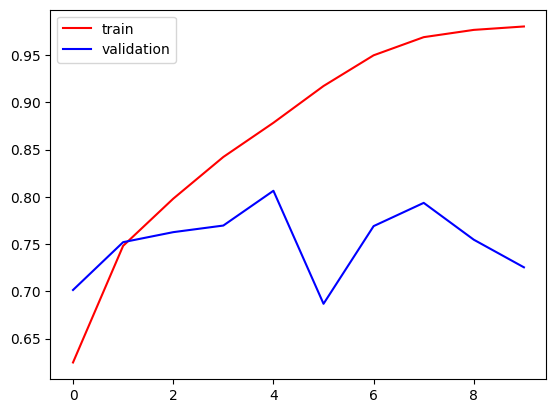

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

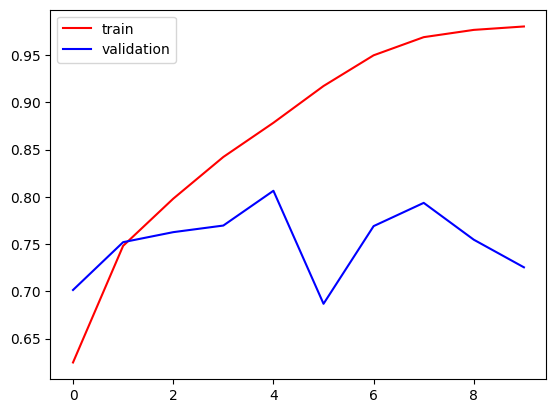

In [12]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

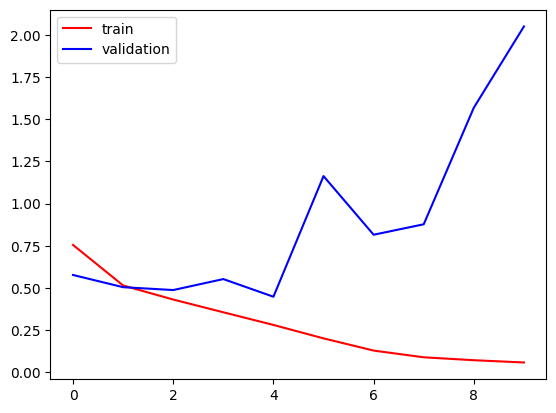

In [13]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [14]:
import cv2

In [15]:
test_image=cv2.imread('/content/cat1.jpg')

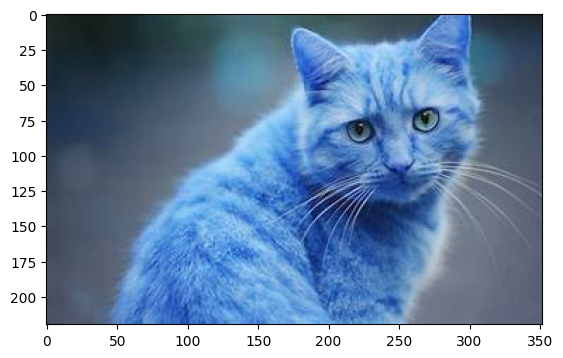

In [16]:
plt.imshow(test_image)

In [17]:
test_image.shape

(220, 352, 3)

In [18]:
test_image=cv2.resize(test_image,(256,256))

In [19]:
test_input=test_image.reshape(1,256,256,3)

In [20]:
#If model predicts 0 then it means it is a cat and if model predicts 1 in the array then it is dog
model.predict(test_input)

1/1 [==============================] - 0s 381ms/step


array([[0.]], dtype=float32)